2. Viết chương trình phân vùng ảnh <br>
2.1 Phân theo histogram <br>
2.1.1 Phương pháp otsu

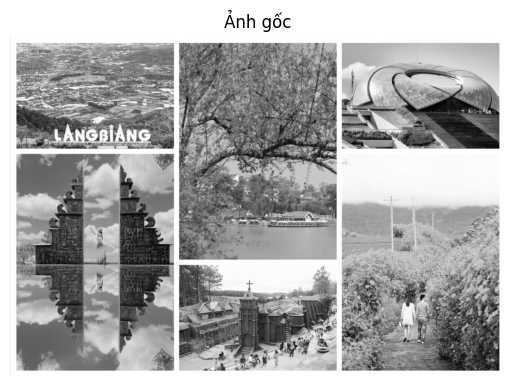

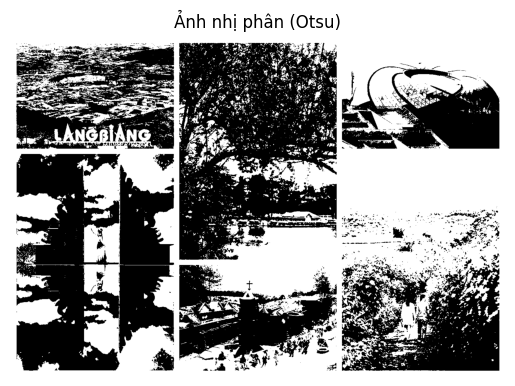

In [7]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_otsu

#đọc ảnh và chuyển sang ảnh xám
data = Image.open('dalat.jpg').convert('L')

plt.imshow(data, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')
plt.show()

#chuyển ảnh xám thành mảng numpy
a = np.asarray(data)

#tính ngưỡng Otsu
thres = threshold_otsu(a)

#phân ngưỡng ảnh: tạo ảnh nhị phân
b = a > thres

#chuyển lại về ảnh để hiển thị
b = Image.fromarray(b)

#hiển thị ảnh sau phân ngưỡng
plt.imshow(b)
plt.title("Ảnh nhị phân (Otsu)")
plt.axis('off')
plt.show()


2.1.2 Phương pháp Adaptive Thresholding

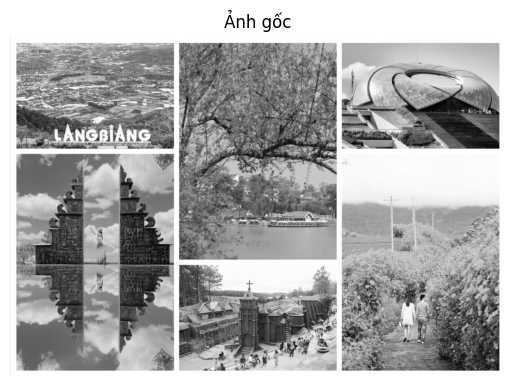

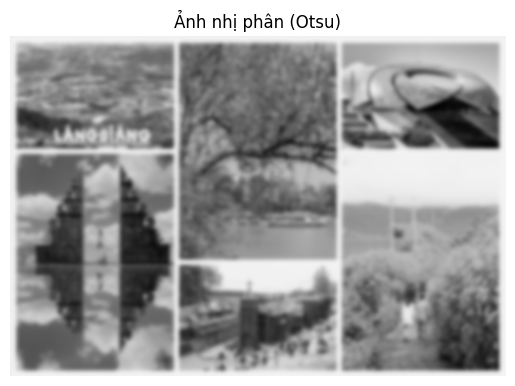

In [8]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local

#đọc ảnh và chuyển sang ảnh xám
data = Image.open('dalat.jpg').convert('L')

plt.imshow(data, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')
plt.show()

#chuyển ảnh xám thành mảng numpy
a = np.asarray(data)

#thực hiện phân ngưỡng cục bộ
b = threshold_local(a, 39, offset = 10)

#chuyển lại về ảnh để hiển thị
b = Image.fromarray(b)

#hiển thị ảnh sau phân ngưỡng
plt.imshow(b)
plt.title("Ảnh nhị phân (Otsu)")
plt.axis('off')
plt.show()


2.2 Phân vùng theo region

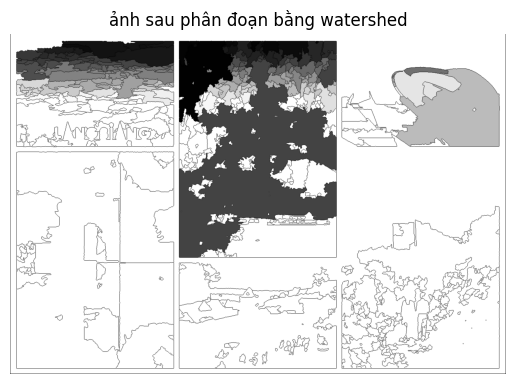

In [10]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

#đọc ảnh và chuyển ảnh sang xám
data = cv2.imread('dalat.jpg')

#chuyển ảnh từ màu sang ảnh xám
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

#phân ngưỡng ảnh để lấy các pixel thuộc tế bào
thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#vì phương pháp otsu phân đoạn quá mức nên thực hiện phép co ảnh
b2 = cv2.erode(b1, None, iterations=2)

#thực hiện biến đổi khoảng cách (distance transform)
dist_trans = cv2.distanceTransform(b2, 2, 3)

#phân ngưỡng ảnh khoảng cách để lấy các pixel thuộc tiền cảnh
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)

#gán nhãn các vùng ảnh
labelled, ncc = label(dt)

#chuyển nhãn sang kiểu số nguyên 32-bit
labelled = labelled.astype(np.int32)

#thực hiện giải thuật watershed
cv2.watershed(data, labelled)

#chuyển ảnh kết quả thành ảnh PIL để hiển thị
b = Image.fromarray(labelled)

#hiển thị ảnh kết quả
plt.imshow(b)
plt.axis('off')
plt.title("ảnh sau phân đoạn bằng watershed")
plt.show()


2.3 Biến đổi đối tượng trong ảnh <br>
2.3.1 Sử dụng binary_dilation

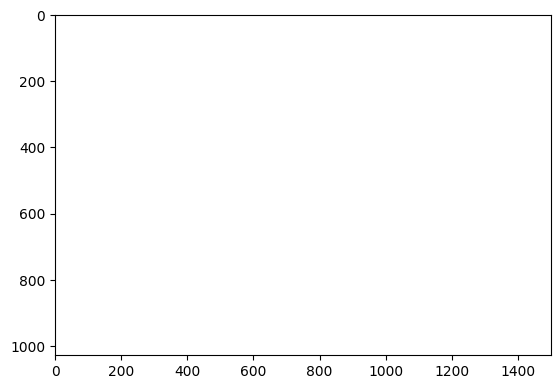

In [12]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

#mở ảnh và chuyển sang ảnh xám
data = Image.open('dalat.jpg').convert('L')
b = nd.binary_dilation(data, iterations = 50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

2.3.2 Sử dụng binary_opening

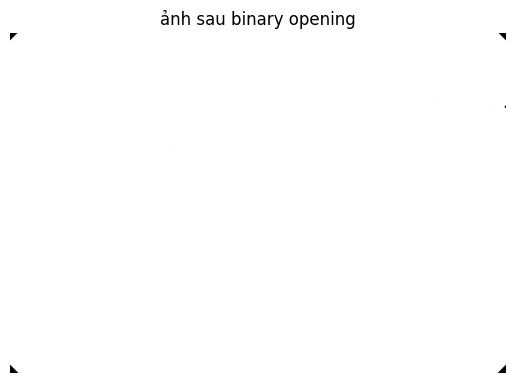

In [ ]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

#mở ảnh và chuyển ảnh sang xám
data = Image.open('dalat.jpg').convert('L')

#định nghĩa phần tử cấu trúc
s = [[0,1,0],[1,1,1],[0,1,0]]

#thực hiện phép mở nhị phân với 25 lần lặp
b = nd.binary_opening(data, structure=s, iterations=25)

#chuyển mảng kết quả thành ảnh PIL
c = Image.fromarray(b)

c_array = np.array(c) * 255
c_array = c_array.astype(np.uint8)

plt.imshow(c_array, cmap='gray')
plt.title("ảnh sau binary opening")
plt.axis('off')
plt.show()


2.3.3 Sử dụng binary_erosion

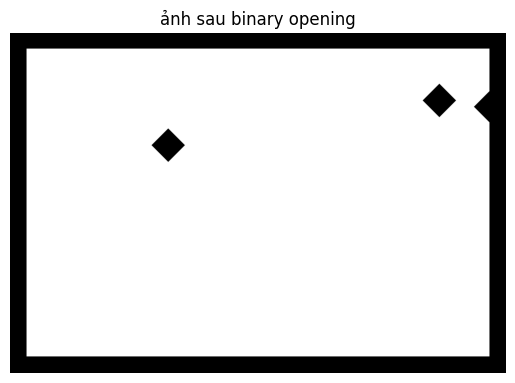

In [ ]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

#mở ảnh và chuyển ảnh sang xám
data = Image.open('dalat.jpg').convert('L')

#định nghĩa phần tử cấu trúc
s = [[0,1,0],[1,1,1],[0,1,0]]

#thực hiện phép mở nhị phân với 25 lần lặp
b = nd.binary_erosion(data, structure=s, iterations=50)

#chuyển mảng kết quả thành ảnh PIL
c = Image.fromarray(b)

c_array = np.array(c) * 255
c_array = c_array.astype(np.uint8)

plt.imshow(c_array, cmap='gray')
plt.title("ảnh sau binary opening")
plt.axis('off')
plt.show()


2.3.4 Sử dụng binary_closing

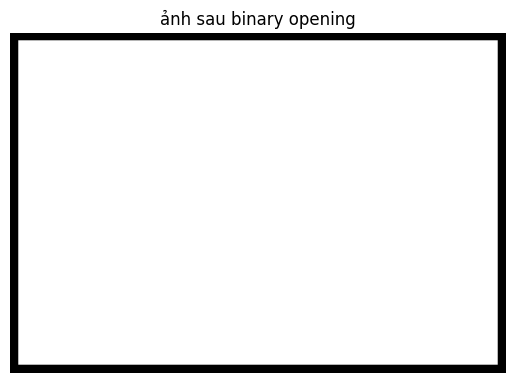

In [ ]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

#mở ảnh và chuyển ảnh sang xám
data = Image.open('dalat.jpg').convert('L')

#định nghĩa phần tử cấu trúc
s = [[0,1,0],[1,1,1],[0,1,0]]

#thực hiện phép mở nhị phân với 25 lần lặp
b = nd.binary_closing(data, structure=s, iterations=25)

#chuyển mảng kết quả thành ảnh PIL
c = Image.fromarray(b)

c_array = np.array(c) * 255
c_array = c_array.astype(np.uint8)

plt.imshow(c_array, cmap='gray')
plt.title("ảnh sau binary opening")
plt.axis('off')
plt.show()
